In [1]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/rhwf-F0CnSc", width=1920/2, height=1080/2)

In [2]:
import math
from qiskit import qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector
from qiskit.circuit.library import QFT
%matplotlib inline

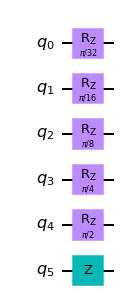

In [3]:
qc_plus_one = QuantumCircuit(6, name='qc_plus_one')
qc_plus_one.rz(math.pi/32,0)
qc_plus_one.rz(math.pi/16,1)
qc_plus_one.rz(math.pi/8,2)
qc_plus_one.rz(math.pi/4,3)
qc_plus_one.rz(math.pi/2,4)
qc_plus_one.z(5)

gate_plus_one = qc_plus_one.to_gate()
control_gate_plus_one = gate_plus_one.control()

qc_plus_one.draw(output="mpl")

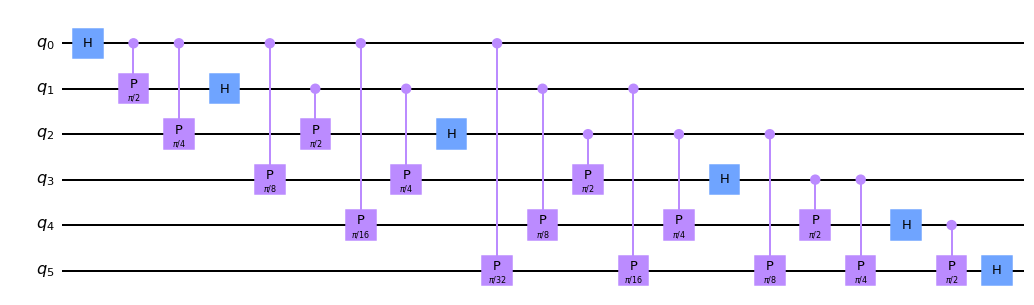

In [4]:
qft_gate_norm = QFT(num_qubits=6, approximation_degree=0, do_swaps=False, inverse=False, insert_barriers=False, name='qft_gate')
qft_gate_six_norm = qft_gate_norm.to_gate()

qft_gate_norm.draw(output="mpl")

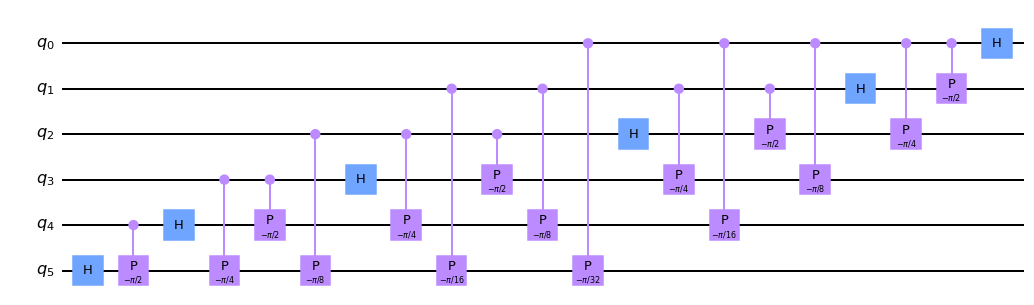

In [5]:
qft_gate_inv = QFT(num_qubits=6, approximation_degree=0, do_swaps=False, inverse=True, insert_barriers=False, name='qft_gate_inv')
qft_gate_six_inverse = qft_gate_inv.to_gate()

qft_gate_inv.draw(output="mpl")

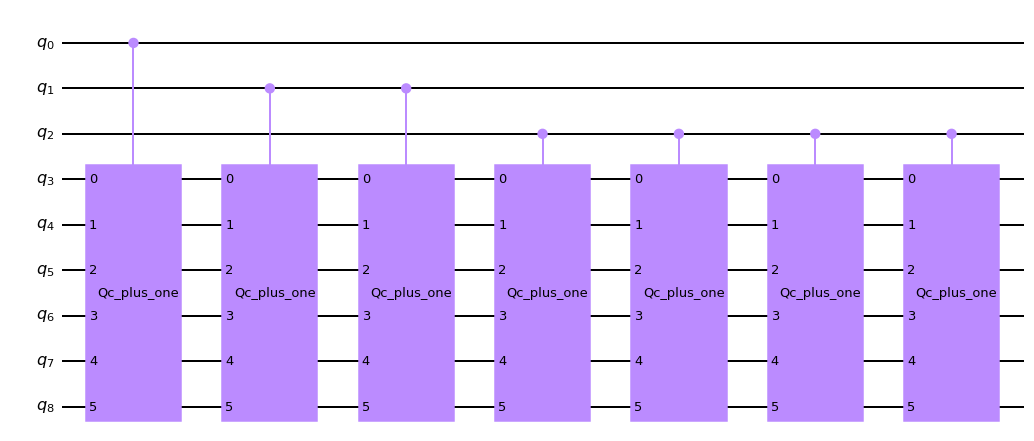

In [6]:
qc_gate_mul_y = QuantumCircuit(9, name="gate_mul_y")

qc_gate_mul_y.append(control_gate_plus_one, [0,3,4,5,6,7,8])
qc_gate_mul_y.append(control_gate_plus_one, [1,3,4,5,6,7,8])
qc_gate_mul_y.append(control_gate_plus_one, [1,3,4,5,6,7,8])
qc_gate_mul_y.append(control_gate_plus_one, [2,3,4,5,6,7,8])
qc_gate_mul_y.append(control_gate_plus_one, [2,3,4,5,6,7,8])
qc_gate_mul_y.append(control_gate_plus_one, [2,3,4,5,6,7,8])
qc_gate_mul_y.append(control_gate_plus_one, [2,3,4,5,6,7,8])

mul_y_gate = qc_gate_mul_y.to_gate()
control_mul_y_gate = mul_y_gate.control()

qc_gate_mul_y.draw(output="mpl")

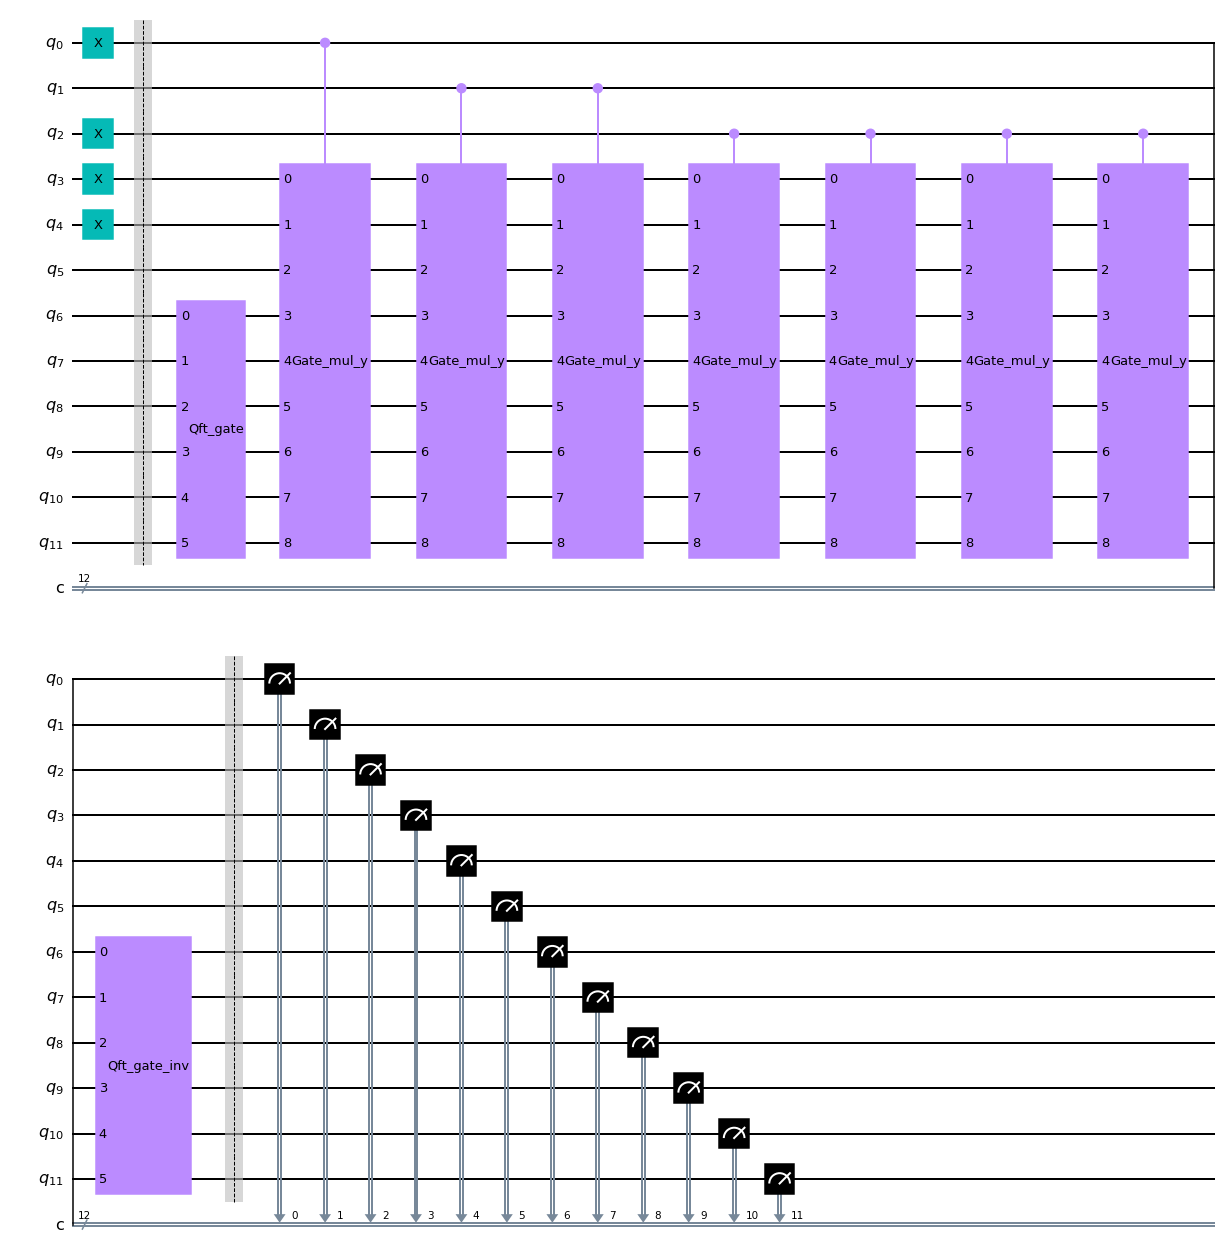

In [13]:
qc_x_mul_y = QuantumCircuit(12, 12)
qc_x_mul_y.name = "circuit_x_mul_y"

#multiply --> 5 x 3 = 15
qc_x_mul_y.x(0)
qc_x_mul_y.x(2)
qc_x_mul_y.x(3)
qc_x_mul_y.x(4)
#qc_x_mul_y.x(5)
qc_x_mul_y.barrier()
qc_x_mul_y.append(qft_gate_six_norm, [6, 7, 8, 9, 10, 11])
qc_x_mul_y.append(control_mul_y_gate, [0,3,4,5,6,7,8,9,10,11])
qc_x_mul_y.append(control_mul_y_gate, [1,3,4,5,6,7,8,9,10,11])
qc_x_mul_y.append(control_mul_y_gate, [1,3,4,5,6,7,8,9,10,11])
qc_x_mul_y.append(control_mul_y_gate, [2,3,4,5,6,7,8,9,10,11])
qc_x_mul_y.append(control_mul_y_gate, [2,3,4,5,6,7,8,9,10,11])
qc_x_mul_y.append(control_mul_y_gate, [2,3,4,5,6,7,8,9,10,11])
qc_x_mul_y.append(control_mul_y_gate, [2,3,4,5,6,7,8,9,10,11])
qc_x_mul_y.append(qft_gate_six_inverse, [6, 7, 8, 9, 10, 11])
qc_x_mul_y.barrier()

qc_x_mul_y.measure(range(0,12), range(0,12))

qc_x_mul_y.draw(output="mpl")

In [14]:
# simulators
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")
qasm_sim = qiskit.Aer.get_backend("qasm_simulator")

In [15]:
#sim_state_vector = qiskit.execute(qc_x_mul_y, backend=statevec_sim).result().get_statevector()
sim_counts = qiskit.execute(qc_x_mul_y, backend=qasm_sim, shots=1).result().get_counts()

{'111100011101': 1}


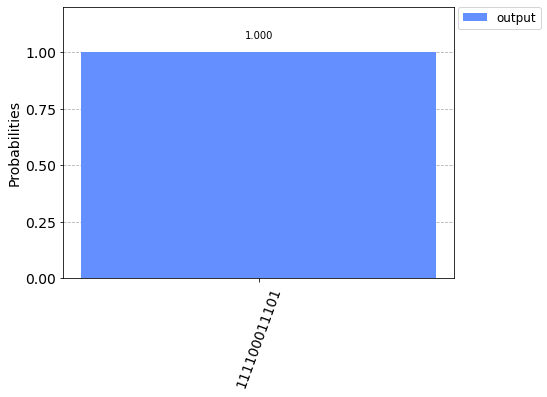

In [16]:
print(sim_counts)
plot_histogram([sim_counts], legend=['output'])

In [11]:
# warnig: high CPU usage
#plot_bloch_multivector(sim_state_vector)

In [12]:
# warnig: high CPU usage
#plot_state_qsphere(sim_state_vector)